In [11]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

xls = pd.ExcelFile('/content/drive/My Drive/matrix.xlsx')
r_table = pd.read_excel(xls, 'Sheet3',index_col=0)
state_value_function = pd.read_excel(xls, 'Sheet2')
transition_matrix = pd.read_excel(xls, 'Sheet4',index_col=0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
r_table

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,Y
A,-1.0,-1.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,-1.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,-1.0,-1.0,-1.0,NaN,NaN,NaN,-100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,-1.0,-1.0,-100.0,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0,-100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-100.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,-100.0,NaN,NaN,NaN,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import numpy as np
from random import sample
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import math
import collections

In [35]:
#Initialize parameters
total_episodes = 100 
number_of_steps = 20 
T = 0.5 
alpha = 0.3 
gamma = 0.99 

#Initialization of the Q matrix
q_table = pd.DataFrame(np.matrix(np.zeros([25,4])).astype("float32"), columns = transition_matrix.columns, index = transition_matrix.index)
q_table.head()

,UP,DOWN,RIGHT,LEFT
A,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,0.0
C,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0


In [36]:
optimal_state_value_function = np.array(state_value_function)
optimal_state_value_function

array([[-8., -7., -6., -5.,  0.],
       [-7., -6.,  0., -4., -3.],
       [ 0., -5., -4., -3., -2.],
       [-1., -4., -3., -2.,  0.],
       [ 0., -3., -2., -1.,  0.]])

In [37]:
e = 2.71828 #inspiraion from labs and https://github.com/Kimonili/Qlearning_DDDQN-reinforcement_learning/blob/master/qlearning_policies/q_learning_boltzmann_custom_env.ipynb

def softmax_policy(state, T):
     
    action_vector = deque(maxlen=4) 
    action_nominator = deque(maxlen=4)
    action_probability_distribution_vector = deque(maxlen=4)
    
    actions_list = ["UP", "DOWN", "RIGHT", "LEFT"]
  
    action_vector = q_table.loc[state, :] 
    print("Action Vector from Q Table", action_vector)
    
    
    
    sum_denominator = 0 
    for i in range(4):
        action_nominator.append(e**(action_vector[i]/T)) 
        sum_denominator += e**(action_vector[i]/T) 
    
    print("Action Nominator: ", action_nominator)
    print("Sum Denominator", sum_denominator)
    
    print("SIZE Action Nominator: ", action_nominator.maxlen)

                               
    # probability distribution                          
    for i in range(4):
        action_probability_distribution_vector.append(action_nominator[i]/sum_denominator) 
    
    print("Action Probability Distribution: ", action_probability_distribution_vector)

    
    rand_val = np.random.uniform(0, 1)
    prob_sum = 0
    for i, prob in enumerate(action_probability_distribution_vector):
        prob_sum += prob
        if rand_val <= prob_sum:
            action = i 
            break
            
    action = str(action) 
     
    if (action == '0'):
        action = action.replace('0', 'UP')
    elif (action == '1'):
        action = action.replace('1','DOWN')
    elif (action== '2'):
        action = action.replace('2', 'RIGHT')
    else:
        action = action.replace('3', 'LEFT')
    
    
    print("Action", action)
    
    return action

In [38]:
def execute_action(state, action):
    next_state = transition_matrix.loc[state,action] 
    reward = r_table.loc[state, next_state]
    end_episode_states = ['E', 'H', 'K', 'U', 'T','Y']
    done = False
    if (next_state in end_episode_states):
        done = True
    print('Current state', state)
    print('Next state', next_state)
    print ('Done', done)
    
    
    return next_state, reward, done

In [39]:

def update_Q(current_state, next_state, action, reward, alpha, gamma):
    q_old = q_table.loc[current_state, action] 
    q_new = q_old + alpha * (reward + gamma * max(q_table.loc[next_state,:] - q_old))
    q_table.loc[current_state, action] = q_new
    
    print('Old Q value:       ', q_old)
    print('Updated Q value : ', q_new)
    print("test",reward + gamma)

In [40]:
#Training the agent
sum_reward = 0


episodes_rewards_list = []
window = 100
average_reward = deque(maxlen=total_episodes)
best_average_reward = -math.inf
check_rewards = deque(maxlen=window)

for episode in range(1, total_episodes + 1):
    current_state = 'A'
    episode_reward = 0
    for step in range (number_of_steps):
        action = softmax_policy(current_state, T)
        
        next_state, reward, done = execute_action(current_state, action)
        
        # Update the Q Matrix based on the new values
        update_Q(current_state, next_state, action, reward, alpha, gamma)
        current_state = next_state
        
        episode_reward += reward 
        
        if done:
            check_rewards.append(episode_reward)
            break

    if episode >= 100:
        average_reward = np.mean(check_rewards)
        if average_reward > best_average_reward:
            best_average_reward = average_reward
    print("\rEpisode {}/{} || Best average reward {}".format(episode, total_episodes, best_average_reward), end="")

    
    if best_average_reward > 83:
        print('\nThe environment is solved in {} episodes.'.format(episode-1), end = "")
        break
    
    episodes_rewards_list.append(episode_reward)
    print("\rThe reward for this episode is: {}".format(episode_reward))
    
    episode_reward = 0

Streaming output truncated to the last 5000 lines.
test -0.5
Action Vector from Q Table UP       -4.733431
DOWN     44.926083
RIGHT   -30.000000
LEFT     -4.419524
Name: G, dtype: float32
Action Nominator:  deque([7.737433999532368e-05, 1.052624064984169e+39, 8.756864175274067e-27, 0.000144961489567241], maxlen=4)
Sum Denominator 1.052624064984169e+39
SIZE Action Nominator:  4
Action Probability Distribution:  deque([7.350614770192183e-44, 1.0, 8.319080350310789e-66, 1.3771439813075257e-43], maxlen=4)
Action DOWN
Current state G
Next state L
Done False
Old Q value:        44.926083
Updated Q value (Q new):  50.837121391296385
test -0.5
Action Vector from Q Table UP       -2.585231
DOWN     -2.386747
RIGHT    86.333008
LEFT    -30.000000
Name: L, dtype: float32
Action Nominator:  deque([0.005681964878599127, 0.008450826491780455, 9.724053897578376e+74, 8.756864175274067e-27], maxlen=4)
Sum Denominator 9.724053897578376e+74
SIZE Action Nominator:  4
Action Probability Distribution:  dequ

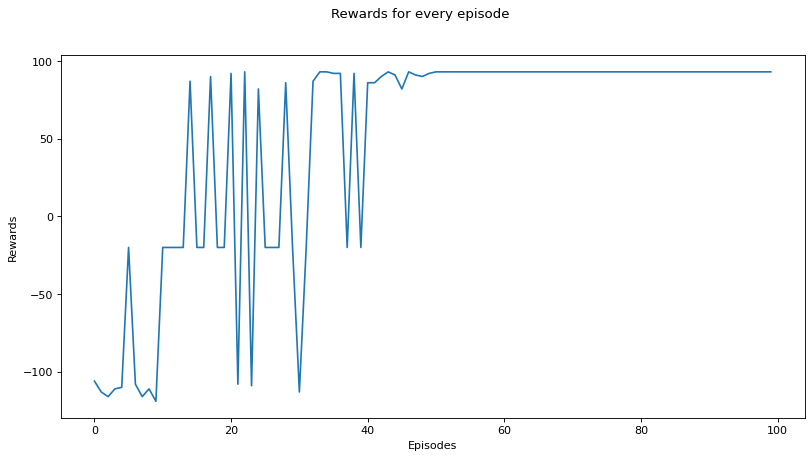

In [41]:

reward_per_episode = pd.DataFrame(np.asarray(episodes_rewards_list)) 
reward_per_episode['episodes'] = reward_per_episode.index
reward_per_episode.columns = ['total_reward', 'episodes']


plt.figure(figsize=(12, 6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.suptitle('Rewards for every episode')
plt.plot(reward_per_episode['episodes'], reward_per_episode['total_reward'])